In [1]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rc('text', usetex = True)

In [2]:
aV   = 15.6 # MeV
aS   = 16.8
asym = 23.3
ac   = 0.72
def B(A,Z,N):
    return aV*A - aS*A**(2.0/3.0) - asym*(Z-N)**2/A - ac*Z**2.0*A**(-1.0/3.0)

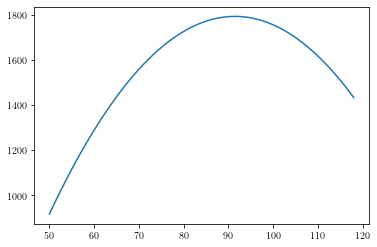

In [5]:
A = 237
Z = np.linspace(50,118)
N = A - Z
plt.plot(Z,B(A,Z,N))

In [6]:
u  = 931.49410242 # MeV/c2
mH = 1.00784*u
mN = 1.008665*u
def m_excess(A,Z,N):
    return -B(A,Z,N) + Z*mH + N*mN - A*u

In [7]:
A = 127
Z = np.array([48,49,58,67])
N = A - Z

hbar = 6.582e-16 * 1e-6 #MeV

hbar / (m_excess(A,Z,N) - m_excess(A,53,127-53))

array([2.44613615e-23, 3.65305420e-23, 3.88383289e-23, 4.16670659e-24])

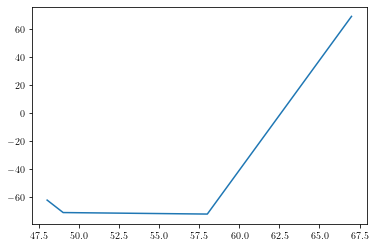

In [8]:
plt.plot(Z,m_excess(A,Z,N))

In [12]:
def f(A,Z,d=0):
    N = A - Z
    if Z % 2 == 0: return m_excess(A,Z,N) - d
    elif Z % 2 == 1: return m_excess(A,Z,N) + d

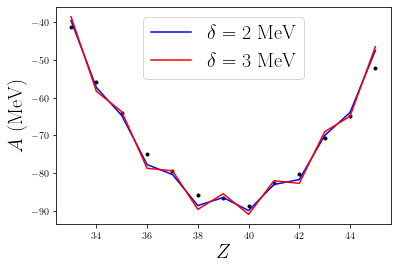

In [25]:
A = 90
Z = np.array([33,34,35,36,37,38,39,40,41,42,43,44,45])
delta = 10**(-3.0)*np.array([
                         -41330,
                         -55800.217,
                         -64000.297,
                         -74959.250,
                         -79364.730,
                         -85948.917,
                         -86494.860,
                         -88773.558,
                         -82662.222,
                         -80172.886,
                         -70724.686,
                         -64883.792,
                         -51959
                        ])

plt.plot(Z,delta,'k.')
plt.plot(Z,[f(A,Z_,2) for Z_ in Z],'b',label=r'$\delta = 2~{\rm MeV}$')
plt.plot(Z,[f(A,Z_,3) for Z_ in Z],'r',label=r'$\delta = 3~{\rm MeV}$')
plt.legend(fontsize=20)
plt.xlabel(r'$Z$',size=20)
plt.ylabel(r'$A~({\rm MeV})$',size=20)
plt.savefig('prob6-5(1).pdf',bbox_inches='tight')
plt.show()

In [32]:
import sympy as sp

In [82]:
A,Z,N = sp.symbols(r'A Z N',real=True, positive=True)
av,aS,asym,ac = sp.symbols(r'a_v a_s a_{sym} a_c',real=True,positive=True)
B = av*A - aS*A**sp.Rational(2,3) - asym*(2*Z-A)**2/A - ac*Z**2*A**sp.Rational(-1,3)

In [83]:
sol = sp.solve(B.diff(Z),Z)[0]
display(sol)
sp.N(sol.subs(asym,23.3).subs(ac,0.72).subs(A,237))

2*A**(4/3)*a_{sym}/(4*A**(1/3)*a_{sym} + A*a_c)

91.4452608422861

In [57]:
sp.solve(-B.diff(Z),Z)[0]

2*A**(4/3)*a_{sym}/(4*A**(1/3)*a_{sym} + A*a_c)

In [78]:
def Z_stable(A):
    asym = 23.3
    ac   = 0.72
    return 2*A**(4.0/3.0)*asym/(4*A**(1.0/3.0)*asym+A*ac)

In [84]:
A = np.linspace(1,250)
Z = Z_stable(A)

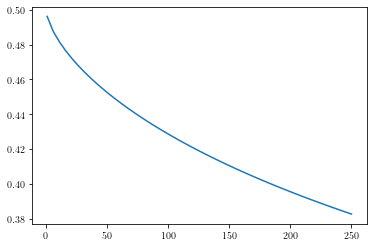

In [86]:
plt.plot(A,Z/A)
plt.show()

In [90]:
(40*10**6/8.617e-5)/670000

692833.8463190604